# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

# Libraries

In [292]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# View Data

In [293]:
# read data file
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [294]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [295]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [296]:
# columns to focus on

df = data[['race','call']]
df.describe(include='all')

,race,call
count,4870,4870.000000
unique,2,NaN
top,w,NaN
freq,2435,NaN
mean,NaN,0.080493
std,NaN,0.272079
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [297]:
# filter the 2 columns per race

w = df[df.race=='w']
b = df[df.race=='b']

In [298]:
# observed proportions

# whites
call_w = len(w[w.call==1])
app_w = len(w)
prop_w = call_w / app_w

# blacks
call_b = len(b[b.call==1])
app_b = len(b)
prop_b = call_b / app_b

# list of stats
stats_w = [call_w, app_w ,prop_w]
stats_b = [call_b, app_b ,prop_b]

print('Race: [calls, applications, proportion]')
print('W:', stats_w)
print('B:', stats_b)

Race: [calls, applications, proportion]
W: [235, 2435, 0.09650924024640657]
B: [157, 2435, 0.06447638603696099]


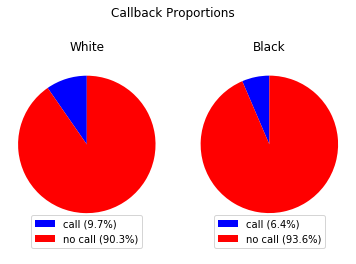

In [299]:
# pie chart of of calls per race

colors = ['blue', 'red']

f, (ax_w, ax_b) = plt.subplots(1,2)

# white
ax_w.pie([call_w, app_w - call_w], 
         colors=colors,
         startangle=90)
ax_w.axis('equal')
ax_w.set_title('White', pad='-15')
ax_w.legend(['call ('+str(round(100*prop_w,1))+'%)', 
             'no call ('+str(round(100-100*prop_w,1))+'%)'], loc=8)

# black
ax_b.pie([call_b, app_b - call_b], 
         colors=colors,
         startangle=90)
ax_b.axis('equal')
ax_b.set_title('Black', pad='-15')
ax_b.legend(['call ('+str(round(100*prop_b,1))+'%)', 
             'no call ('+str(round(100-100*prop_b,1))+'%)'], loc=8)

_ = f.suptitle('Callback Proportions')

# 1) Appropriate Test? CLT Apply?
What test is appropriate for this problem? Does the Central Limit Theorem (CLT) apply?

## 1a) Appropriate Test?

* The problem is whether or not calls are dependent upon race.
* The appropriate test for this problem is the z-statistic two sample, proportions test.

## 1b) CLT Apply?
There are three conditions in which the Central Limit Theorem can be applied.
* Random
* Normal
* Independent

### Random
Random sample or randomized experiment
* Each value in the "race" column are assigned randomly to the resumes when presented to the employer

### Normal
The sampling distribution needs to be approximately normal
* expected successes: np >= 10
* AND
* expected failures: n(1−p) >= 10

In [300]:
# check for normality

exp_suc_w = len(w[w.call==1])
exp_fail_w = len(w[w.call==0])

exp_suc_b = len(b[b.call==1])
exp_fail_b = len(b[b.call==0])

exp = [exp_suc_w, exp_fail_w, exp_suc_b, exp_fail_b]
print(exp)

if(all(x >= 10 for x in exp)):
    print('The Sampling Distribution is approximately Normal.')
else:
    print('The Sampling Distribution is NOT approximately Normal.')

[235, 2200, 157, 2278]
The Sampling Distribution is approximately Normal.


### Independent
Individual Observations need to be Independent
* Sample with replacement
* OR
* Sample without replacement when (n ≤ 10% of N)

In [301]:
# sample with replacement

It was not stated that the data was sampled with replacement.

In [302]:
# sample without replacement

# number of resumes in data
n = df.shape[0]

# approximately the number of workers in the US in 2000 (113M)
N = 113000000

print('n: ', n)
print('N: ', N)
print('n is roughly ', round(100*n/N,4), '% of N.')

if n <= 0.1 * N:
    print('It can be assumed that the Individual Observations are Independent.')
else:
    print('It can NOT be assumed that the Individual Observations are Independent.')

n:  4870
N:  113000000
n is roughly  0.0043 % of N.
It can be assumed that the Individual Observations are Independent.


## Answer #1
The appropriate test is the z-statistic two sample, proportions test.

The Central Limit Theorom (CLT) can be used because the data meets all three conditions
* Random
* Normal
* Independent

# 2) Null and Alternative Hypothesis?

## Null Hypothesis (H0)
Race has a NO Significant Impact on the rate of Callbacks for resumes
* The proportion of calls vs applicants is the same for both whites and blacks
* pro_w = pro_b

## Alternative Hypothesis (Ha)
Race has a Significant Impact on the rate of Callbacks for resumes
* The proportion of calls vs applicants is NOT the same for both whites and blacks
* pro_w $\neq$ pro_b

## Hypothesis Testing
* Test Statistic = Mean
* Significance Level = 0.05
* Confidence Level = 95%

In [303]:
alpha = 0.05
sim_size = 10000

# 3) Calculate Statistics about the Data

Statistics
* Margin of Error (moe)
* Confidence Interval (conf_int)
* p-value (p-value)

Approaches
* Bootstrapping
* Frequentist Statistical

## z-statistic

In [304]:
# calculate the standard deviation

prop_diff = prop_w - prop_b

# assuming the Null Hypothesis is True (pro_w = pro_b)

# combined proportion = (success_w + success_b) / (attempts_w + attempts_b)
pro_c = (call_w + call_b) / (app_w + app_b)

# variance = 
#    [(combined proportion)(1-combined proportion) / attempts_w] + 
#    [(combined proportion)(1-combined proportion) / attempts_b] 
var_c = (pro_c)*(1-pro_c)/(app_w) + (pro_c)*(1-pro_c)/(app_b)

# standard deviation = the square root of the variance
std_c = np.sqrt(var_c)

print('Standard Deviation: ', std_c)

Standard Deviation:  0.007796894036170457


In [305]:
# z-statistic

# z-statistic = (proportion white - proportion black) / (standard deviation)
z_stat = (prop_w - prop_b) / (std_c)
print('z-statistic: ', z_stat)

z-statistic:  4.108412152434346


In [306]:
# p-value

# p-value = the area under the curve, two tailed
p_value = (1-stats.norm.cdf(z_stat)) * 2

if p_value > alpha:
    print('The p-value (', p_value, ') is greater than alpha (', alpha, ').')
    print('Failed to Reject the Null Hypothesis (H0).')
    print('There is NO Significant Difference between white and black applicants.')
else:
    print('The p-value (', p_value, ') is less than alpha (', alpha, ')')
    print('Reject the Null Hypothesis (H0).')
    print('There is a Significant Difference between white and black applicants.')

The p-value ( 3.983886837577444e-05 ) is less than alpha ( 0.05 )
Reject the Null Hypothesis (H0).
There is a Significant Difference between white and black applicants.


## z-critical, Margin of Error, and Confidence Interval

In [307]:
# z-critical

q = 1 - (alpha/2)
z_crit = stats.norm.ppf(q)
print('z-critical: ', z_crit)

z-critical:  1.959963984540054


In [308]:
# margin of error

moe = z_crit * std_c
print('Margin of Error: ', moe)

Margin of Error:  0.015281631502169232


In [309]:
# confidence interval

conf_int = [prop_diff - moe, prop_diff + moe]
print('Confidence Interval: ', conf_int)

Confidence Interval:  [0.01675122270727635, 0.04731448571161482]


## Bootstrapping
Resample the data and perform the statistical inference

In [310]:
# define the function for the proportion difference

def bs_prop_diff(data1, data2):
    prop1 = np.sum(data1.call == 1) / len(data1)
    prop2 = np.sum(data2.call == 1) / len(data2)
    return abs(prop1 - prop2)

In [311]:
# define the function for the bs samples

def bs_draw_replicates(data1, data2, func, size=1):
    rep_prop_diffs = np.empty(size)
    
    for i in range(size):
        sample_combined = pd.concat([data1, data2])
        # shuffle the combined df with replacement
        sample_shuff = sample_combined.sample(n=len(data1)+len(data2), replace=True)
        
        # split the shuffled data into 2 separate dataframes
        s1 = sample_shuff.iloc[:len(data1),:]
        s2 = sample_shuff.iloc[len(data1):,:]
        
        rep_prop_diffs[i] = func(s1, s2)
    return rep_prop_diffs

In [312]:
# generate the sample diffs

sample_diffs = bs_draw_replicates(w, b, bs_prop_diff, size=sim_size)
print(sample_diffs[:5])

[0.00123203 0.0073922  0.0036961  0.01026694 0.00492813]


In [313]:
# p-value

p_value = np.sum(sample_diffs >= prop_diff) / len(sample_diffs)
if p_value > alpha:
    print('The p-value (', p_value, ') is greater than alpha (', alpha, ').')
    print('Failed to Reject the Null Hypothesis (H0).')
    print('There is NO Significant Difference between white and black applicants.')
else:
    print('The p-value (', p_value, ') is less than alpha (', alpha, ')')
    print('Reject the Null Hypothesis (H0).')
    print('There is a Significant Difference between white and black applicants.')

The p-value ( 0.0002 ) is less than alpha ( 0.05 )
Reject the Null Hypothesis (H0).
There is a Significant Difference between white and black applicants.


## Answer #3
There is a Significant Difference between white and black applicants.
* The p-value is less than alpha
* The Confidence Interval is entirely positive. Therefore, with a 95% confidence, the mean difference will fall within that range
* With Bootstrapping, the p-value is less than alpha

# 4) Story Telling
Write a story describing the statistical significance in the context or the original problem.

To recap, identical resumes were set in as applications for employment; the only difference being black-sounding and white-sounding names. According to this dataset (race vs. call), there is a significant difference between the proportions of callbacks for white vs. blacks. The most convincing statistic is that when using a z-statistic and a condifence level of 95%, the confidence interval is from 1.7%-4.7%, in favor of whites. These numbers represent the difference in percentage points between white and black sounding names.

# 5) Most Important Factor is Race?
* Does this analysis mean that race/name is the most important factor in callback success?
* Why or why not? 
* If not, how would you amend your analysis?

No, this analysis does NOT mean that the race/name is the MOST IMPORTANT factor in callback success. It means that it is ONE of the factors that plays a role in the application process. This analysis only entails the two columns of data, race and callbacks. Other columns could be analyzed in a similar fashion, and they may or may not play a bigger role in the outcome of the process and the outcome of a callback.